In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(style='ticks', palette='Set2')

from scipy import stats
from scipy.stats import norm

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1) 
np.set_printoptions(threshold=np.nan)

In [2]:
housing = pd.read_csv('../../../Downloads/melbourne_housing.csv')

In [3]:
housing.head() # address equivalent to id

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
housing.info() # 'Price' has some null?  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52964 entries, 0 to 52963
Data columns (total 12 columns):
Suburb           52964 non-null object
Address          52964 non-null object
Rooms            52964 non-null int64
Type             52964 non-null object
Price            41196 non-null float64
Method           52964 non-null object
SellerG          52964 non-null object
Date             52964 non-null object
Regionname       52964 non-null object
Propertycount    52964 non-null int64
Distance         52964 non-null float64
CouncilArea      52964 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


In [5]:
housing.isnull().sum()

Suburb           0    
Address          0    
Rooms            0    
Type             0    
Price            11768
Method           0    
SellerG          0    
Date             0    
Regionname       0    
Propertycount    0    
Distance         0    
CouncilArea      0    
dtype: int64

- **Will be dropping rows with NaN in target variable, 'Price'**

In [6]:
# house_clean0 = dropped nulls from target variable

nulls = housing[housing['Price'].isnull()].index # index of nulls

house_clean0 = housing.drop(nulls, 0) # cleaning nulls
house_nulls = housing.iloc[nulls, :] # df of nulls, in case

# shortening 'CouncilArea' categories
house_clean0['CouncilArea'] = house_clean0['CouncilArea'].str[:-13]

# converting 'Date'
house_clean0['Date'] = pd.to_datetime(house_clean0['Date']) 
house_clean0['Month'] = house_clean0['Date'].apply(lambda x: x.month).astype(int)
house_clean0['Year'] = house_clean0['Date'].apply(lambda x: x.year).astype(int)

In [7]:
print("There are", len(np.unique(house_clean0['Address'])), "unique 'Address' from the", len(house_clean0), "house sales.")

There are 37886 unique 'Address' from the 41196 house sales.


- **Check 'Address' that are not unique**

### EDA

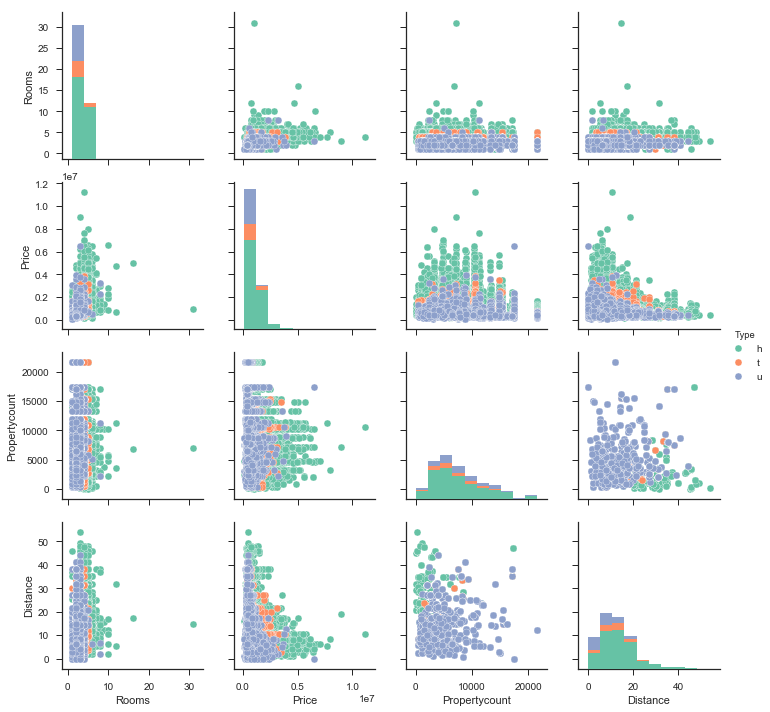

In [8]:
# quick glance for general visual of features
# 'Type': h=house, t=townhouse, u=unit
sns.pairplot(house_clean0.drop(['Month', 'Year'],1), hue='Type')
plt.show()

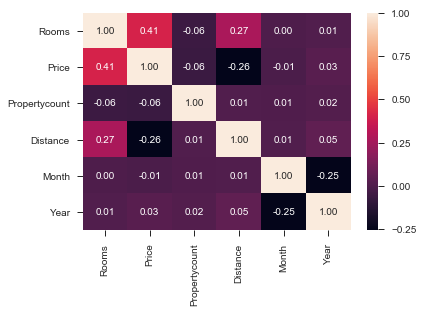

In [9]:
sns.heatmap(house_clean0.corr(), annot=True, fmt='.2f')
# preliminary 

**'Rooms' is showing the most correlation with 'Price', while 'Propertycount' may possibly have no correlation**
- **First check features with little-to-no correlation: 'Propertycount', 'Month', 'Year'

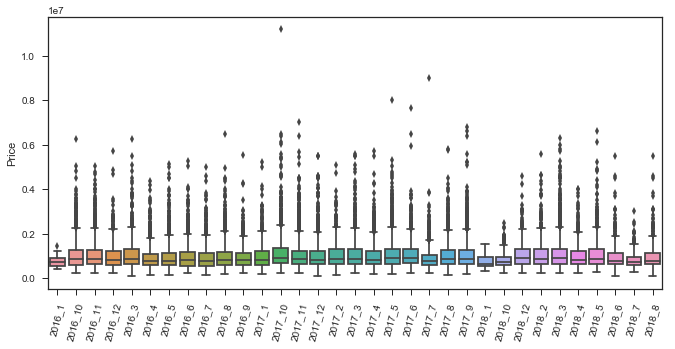

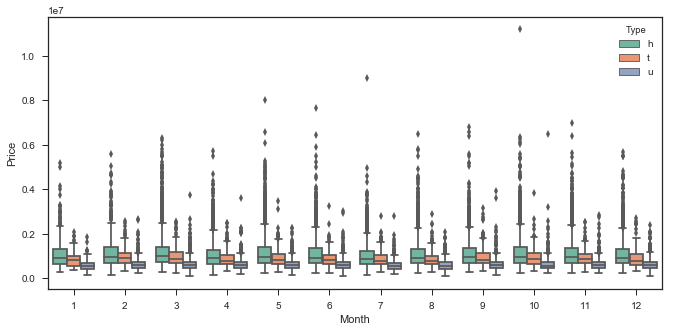

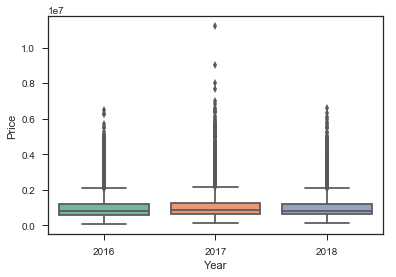

In [10]:
month_year = house_clean0['Year'].map(str) + '_' + house_clean0['Month'].map(str)


plt.subplots(figsize=(11,5))
ax = sns.boxplot(month_year, house_clean0['Price'])
plt.xticks(rotation=75)
plt.show()


plt.subplots(figsize=(11,5))
ax = sns.boxplot(house_clean0['Month'], house_clean0['Price'], hue=house_clean0['Type'])
plt.show() 

ax = sns.boxplot(house_clean0['Year'], house_clean0['Price'])
plt.show()


- **Does not seem to be a long enough time span to have visible signs of inflation? (although inflation has increased in this span)**
***
- **Checking skew in 'Rooms'**

In [11]:
np.unique(house_clean0.Rooms)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 16, 31], dtype=int64)

In [12]:
np.bincount(house_clean0['Rooms'])

array([    0,  1423,  8968, 18598,  9858,  2039,   247,    35,    16,
           2,     6,     0,     2,     0,     0,     0,     1,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     1], dtype=int64)

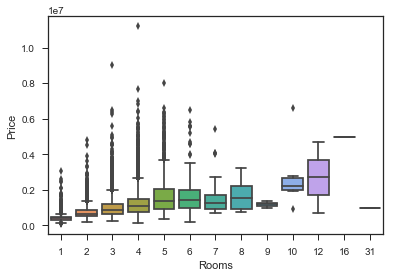

In [13]:
sns.boxplot(x='Rooms', y='Price', data=house_clean0) 
plt.show()

'h': house, 't': townhouse, 'u': unit


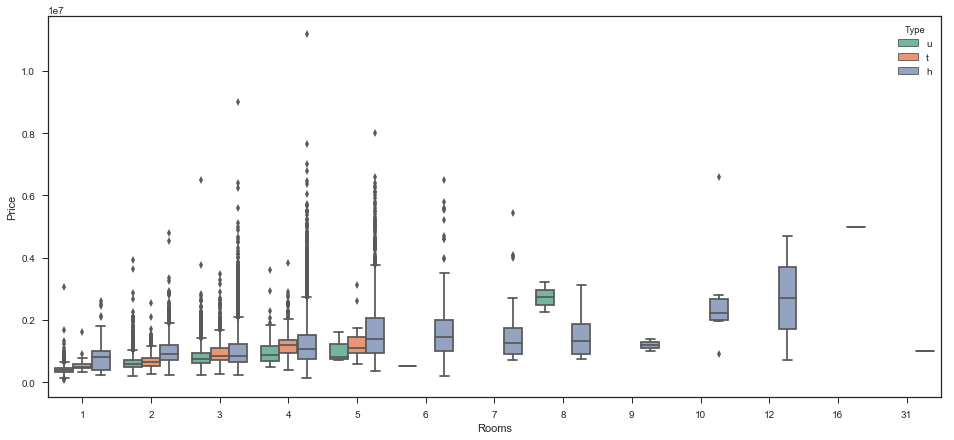

In [14]:
print("'h': house, 't': townhouse, 'u': unit")
plt.figure(figsize=(16,7))
sns.boxplot(x='Rooms', y='Price', hue='Type', data=house_clean0, hue_order=['u','t','h'])
plt.show()

In [15]:
roomstype = house_clean0.groupby(['Rooms', 'Type'])['Price'].mean().reindex(list('uth'), axis=0, level=1).index
roomstype1 = house_clean0.groupby(['Rooms', 'Type'])['Price'].mean().reindex(list('uth'), axis=0, level=1)

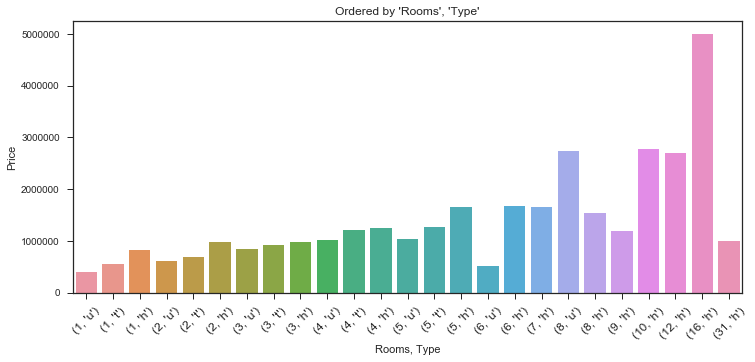

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(roomstype, roomstype1)
plt.xticks(rotation=45, size='large')
plt.xlabel('Rooms, Type')
plt.title("Ordered by 'Rooms', 'Type'")
plt.show()
# 'u' = unit, 't' = townhouse, 'h' = house

In [17]:
# plt.figure(figsize=(12,5))
# sns.barplot(roomstype1.sort_values().index, roomstype1.sort_values())
# plt.xticks(rotation=45, size='large')
# plt.title("Sorted by 'Price' Mean")
# plt.show()

- **Not sure how to feel about binning 'Rooms', as there's a lot of variability which could be potential outliers (see 'Rooms'=31)**
    - **Could be due to other feature (i.e., 'Suburb')**
    - **Could just be result of variability**
***

In [18]:
# sorted avg 'price' mapping
region_ind = house_clean0.groupby('Regionname')['Price'].mean().sort_values().index
# house_clean0['region_map'] = house_clean0['Regionname'].map(dict(zip(region_ind, range(1,len(region_ind)+1))))

council_ind = house_clean0.groupby('CouncilArea')['Price'].mean().sort_values().index
# house_clean0['council_map'] = house_clean0['CouncilArea'].map(dict(zip(council_ind, range(1,len(council_ind)+1))))

method_ind = house_clean0.groupby('Method')['Price'].mean().sort_values().index
# house_clean0['method_map'] = house_clean0['Method'].map(dict(zip(method_ind, range(1,len(method_ind)+1))))

type_ind = house_clean0.groupby('Type')['Price'].mean().sort_values().index
# house_clean0['type_map'] = house_clean0['Type'].map(dict(zip(type_ind, range(1,len(type_ind)+1))))

sub_ind = house_clean0.groupby('Suburb')['Price'].mean().sort_values().index

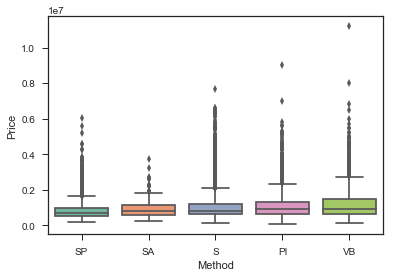

In [19]:
sns.boxplot(house_clean0.Method, house_clean0.Price, order=method_ind)
plt.show()

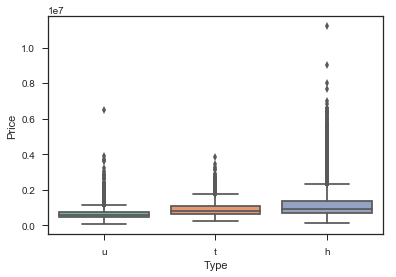

In [20]:
sns.boxplot(house_clean0.Type, house_clean0.Price, order=type_ind)
plt.show()

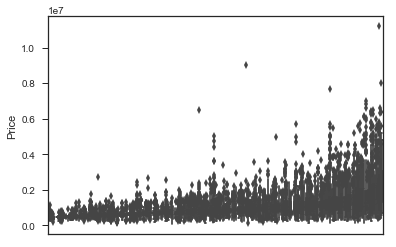

In [21]:
g = sns.boxplot(house_clean0.Suburb, house_clean0.Price, order=sub_ind)
g.axes.get_xaxis().set_visible(False)
plt.show()

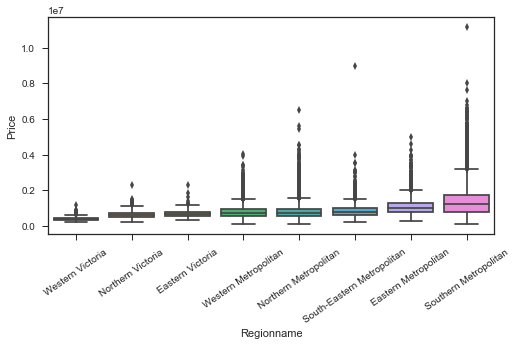

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(house_clean0.Regionname, house_clean0.Price,order=region_ind)
plt.xticks(rotation=35)
plt.show()

- **Focusing visuals on 'CouncilArea' due to in-the-middle amount of unique values**

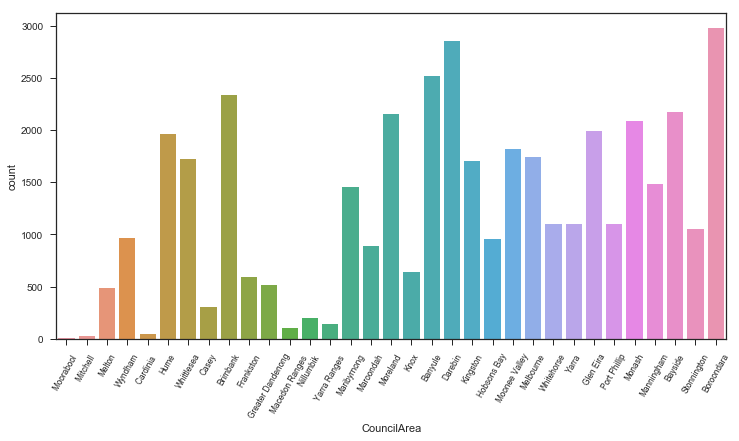

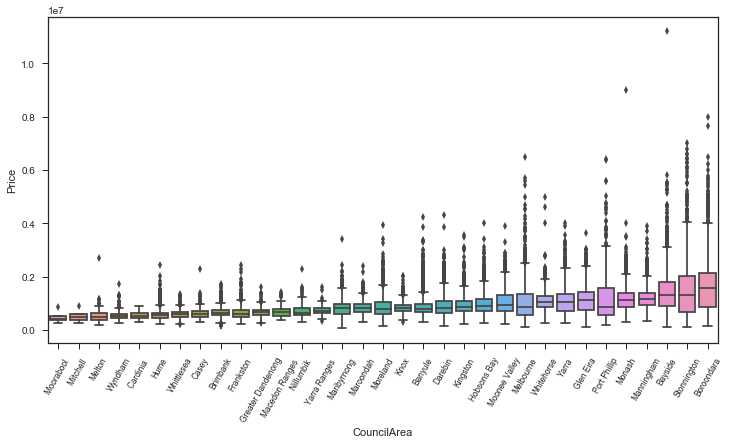

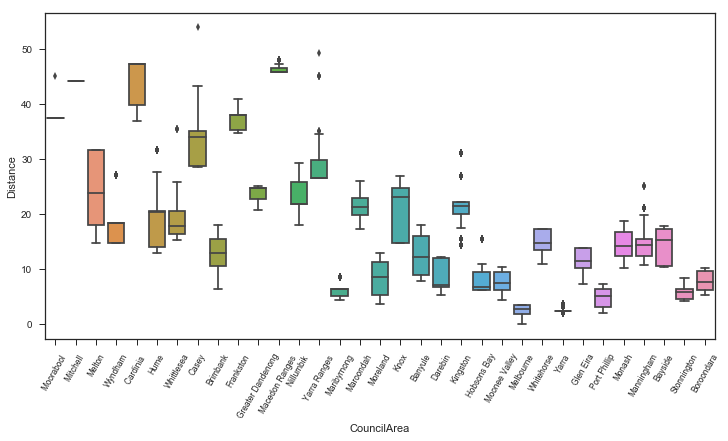

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(house_clean0.CouncilArea, order=council_ind)
plt.xticks(rotation=60, size='small')
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(house_clean0.CouncilArea, house_clean0.Price, order=council_ind)
plt.xticks(rotation=60, size='small')
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(house_clean0.CouncilArea, house_clean0.Distance, order=council_ind)
plt.xticks(rotation=60, size='small')
plt.show()

In [24]:
price_log = np.log(house_clean0['Price'])

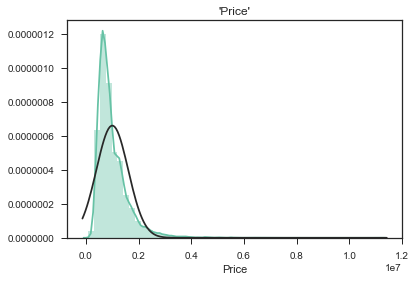

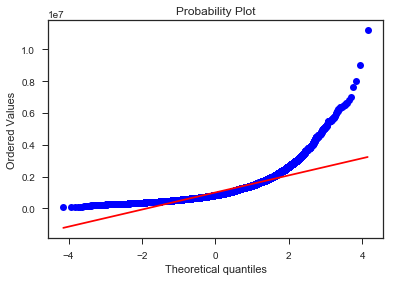

Target feature, 'Price' - Skew: 2.6665	Kurt: 13.7309
------------------------------------------------------------


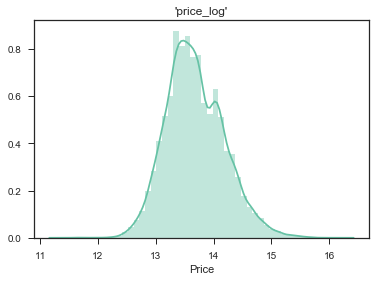

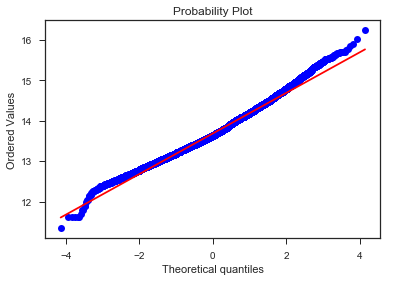

Target feature, 'Price' - Skew: 0.3949	Kurt: 0.2541


In [25]:
sns.distplot(house_clean0['Price'], fit=norm)
plt.title("'Price'")
plt.show()
stats.probplot(house_clean0['Price'], plot=plt)
plt.show()
print("Target feature, 'Price' - Skew: %0.4f\tKurt: %0.4f" %(stats.skew(house_clean0['Price']), stats.kurtosis(house_clean0['Price'])))

print('---------------'*4)

sns.distplot(price_log)
plt.title("'price_log'")
plt.show()
stats.probplot(price_log, plot=plt)
plt.show()
print("Target feature, 'Price' - Skew: %0.4f\tKurt: %0.4f" %(stats.skew(price_log), stats.kurtosis(price_log)))

In [26]:
house_clean0['Rooms1'] = house_clean0['Rooms'].apply(lambda x: 6 if x>6 else x)

house_clean0['price_log'] = price_log.copy()


In [27]:
def get_groups_stats(df, grp_cols, stats='mean'):
    
    if type(grp_cols) == list:
        grp_str = '_'.join(grp_cols)
    else:
        grp_str = grp_cols
        
    if stats == 'mean':
        df_temp = df.groupby(grp_cols)['price_log'].mean().reset_index() # table of avg salary for values in feat
        col_name = stats + '_' + grp_str # new col name
        df_temp.rename(columns={'price_log': col_name}, inplace=True)
        df = df.merge(df_temp, on=grp_cols)
        return df
    elif stats == 'median':
        df_temp = df.groupby(grp_cols)['price_log'].median().reset_index() # table of avg salary for values in feat
        col_name = stats + '_' + grp_str # new col name
        df_temp.rename(columns={'price_log': col_name}, inplace=True)
        df = df.merge(df_temp, on=grp_cols)    
        return df
    elif stats == 'std':
        df_temp = df.groupby(grp_cols)['price_log'].std().reset_index() # table of avg salary for values in feat
        col_name = stats + '_' + grp_str # new col name
        df_temp.rename(columns={'price_log': col_name}, inplace=True)
        df = df.merge(df_temp, on=grp_cols)
        return df
    elif stats == 'count':
        df_temp = df.groupby(grp_cols)['price_log'].count().reset_index() # table of avg salary for values in feat
        col_name = stats + '_' + grp_str # new col name
        df_temp.rename(columns={'price_log': col_name}, inplace=True)
        df = df.merge(df_temp, on=grp_cols)
        return df

In [28]:
###
df = house_clean0.drop(['Month', 'Year', 'Propertycount', 'Distance'],1)


In [29]:
df = get_groups_stats(df, 'CouncilArea', stats='mean')
df = get_groups_stats(df, 'Regionname', stats='mean')
df = get_groups_stats(df, 'Suburb', stats='mean')
df = get_groups_stats(df, 'Type', stats='mean')
df = get_groups_stats(df, 'SellerG', stats='mean')

df = get_groups_stats(df, ['Suburb', 'Type'], stats='mean')
df = get_groups_stats(df, ['Regionname', 'Type'], stats='mean')
df = get_groups_stats(df, ['CouncilArea', 'Type'], stats='mean')
df = get_groups_stats(df, ['Type', 'Rooms1'], stats='mean')
df = get_groups_stats(df, ['Suburb', 'Rooms1'], stats='mean')
df = get_groups_stats(df, ['CouncilArea', 'Rooms1'], stats='mean')
df = get_groups_stats(df, ['Regionname', 'Rooms1'], stats='mean')

df = get_groups_stats(df, ['SellerG', 'Suburb'], stats='mean')
df = get_groups_stats(df, ['SellerG', 'Regionname'], stats='mean')
df = get_groups_stats(df, ['SellerG', 'CouncilArea'], stats='mean')
df = get_groups_stats(df, ['SellerG',  'Type'], stats='mean')
df = get_groups_stats(df, ['SellerG', 'Rooms1'], stats='mean')

df = get_groups_stats(df, ['Suburb', 'Type', 'Rooms1'], stats='mean')
df = get_groups_stats(df, ['Regionname', 'Type', 'Rooms1'], stats='mean')
df = get_groups_stats(df, ['CouncilArea', 'Type', 'Rooms1'], stats='mean')
df = get_groups_stats(df, ['SellerG', 'Type', 'Rooms1'], stats='mean')

df = get_groups_stats(df, ['Suburb', 'SellerG', 'Type', 'Rooms1'], stats='mean')

########################################################

df = get_groups_stats(df, 'CouncilArea', stats='std')
df = get_groups_stats(df, 'Regionname', stats='std')
df = get_groups_stats(df, 'Suburb', stats='std')
df = get_groups_stats(df, 'Type', stats='std')
df = get_groups_stats(df, 'SellerG', stats='std')

df = get_groups_stats(df, ['Suburb', 'Type'], stats='std')
df = get_groups_stats(df, ['Regionname', 'Type'], stats='std')
df = get_groups_stats(df, ['CouncilArea', 'Type'], stats='std')
df = get_groups_stats(df, ['Type', 'Rooms1'], stats='std')
df = get_groups_stats(df, ['Suburb', 'Rooms1'], stats='std')
df = get_groups_stats(df, ['CouncilArea', 'Rooms1'], stats='std')
df = get_groups_stats(df, ['Regionname', 'Rooms1'], stats='std')

df = get_groups_stats(df, ['SellerG', 'Suburb'], stats='std')
df = get_groups_stats(df, ['SellerG', 'Regionname'], stats='std')
df = get_groups_stats(df, ['SellerG', 'CouncilArea'], stats='std')
df = get_groups_stats(df, ['SellerG',  'Type'], stats='std')
df = get_groups_stats(df, ['SellerG', 'Rooms1'], stats='std')

df = get_groups_stats(df, ['Suburb', 'Type', 'Rooms1'], stats='std')
df = get_groups_stats(df, ['Regionname', 'Type', 'Rooms1'], stats='std')
df = get_groups_stats(df, ['CouncilArea', 'Type', 'Rooms1'], stats='std')
df = get_groups_stats(df, ['SellerG', 'Type', 'Rooms1'], stats='std')

df = get_groups_stats(df, ['Suburb', 'SellerG', 'Type', 'Rooms1'], stats='std')


In [30]:
df_mean = df.iloc[:, 0:34]

In [31]:
# reordering 'Price' to first column
col_order = df_mean.columns.tolist()
col_order.remove('Price')
col_order.append(col_order.pop(col_order.index('price_log')))

df_mean = df_mean[col_order]


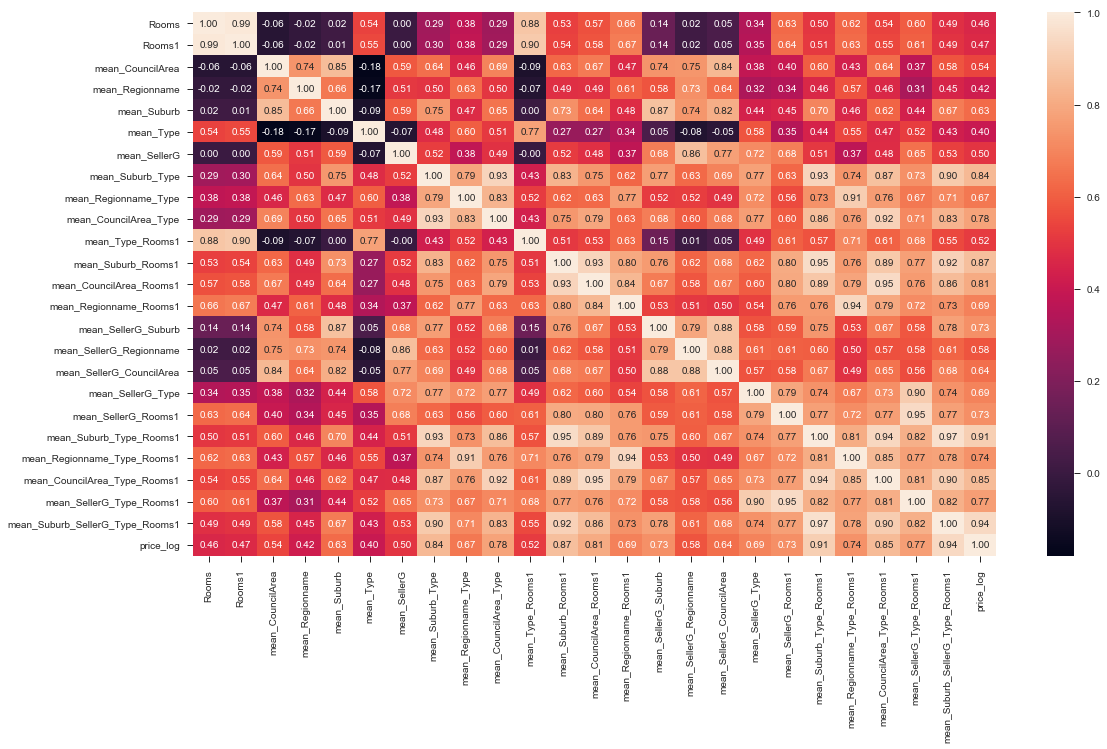

In [32]:

plt.figure(figsize=(18, 10))
sns.heatmap(df_mean.corr(), annot=True, fmt='.2f')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
scaler = StandardScaler()


X = df.drop(['Rooms', 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname', 'CouncilArea', 'Price', 'price_log'],1)

# filling NaN from 'std_' features 
X.fillna(0, inplace=True)


Xfeatures = X.columns

In [35]:
X = scaler.fit_transform(X)
y = df.price_log.copy()

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

yexp_test = np.exp(y_test)

In [36]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = np.exp(lr.predict(X_test))
print ('R2 score on test:', lr.score(X_test,y_test))
print ('RMSE on test', np.sqrt(mean_squared_error(yexp_test, y_pred_lr)))
print ('MAE on test', mean_absolute_error(yexp_test, y_pred_lr)) 

R2 score on test: 0.8828646329543907
RMSE on test 229194.72082609954
MAE on test 124930.70090223363


In [37]:
alphaL = [10**i for i in range(3,-5,-1)]
alphas = [10**i for i in range(-4,4)]

In [38]:
lasso = LassoCV(random_state=42, alphas=alphaL)
lasso.fit(X_train, y_train)
y_pred_las = np.exp(lasso.predict(X_test))
print ('R2 score on test:', lasso.score(X_test,y_test))
print ('RMSE on test', np.sqrt(mean_squared_error(yexp_test, y_pred_las)))
print ('MAE on test', mean_absolute_error(yexp_test, y_pred_las)) 

R2 score on test: 0.8831261629853389
RMSE on test 229110.92813497098
MAE on test 124460.32113005834


In [39]:
ridge = RidgeCV(scoring='neg_mean_squared_error', alphas=alphas)
ridge.fit(X_train,y_train)
y_pred_rid = np.exp(ridge.predict(X_test))
print ('R2 score on test:', ridge.score(X_test,y_test))
print ('RMSE on test', np.sqrt(mean_squared_error(yexp_test, y_pred_rid)))
print ('MAE on test', mean_absolute_error(yexp_test, y_pred_rid)) 

R2 score on test: 0.8828774679190883
RMSE on test 229189.98840786697
MAE on test 124937.87245802664


In [40]:
# import os

# mingw_path = 'C:\Program Files\mingw-w64\x86_64-8.1.0-posix-seh-rt_v6-rev0\mingw64\bin'

# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from xgboost import XGBRegressor

In [41]:
xgb= XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = np.exp(xgb.predict(X_test))
print  ('score on test:',  xgb.score(X_test,y_test))
print ('RMSE on test', np.sqrt(mean_squared_error(yexp_test, y_pred_xgb)))
print ('MAE on test', mean_absolute_error(yexp_test, y_pred_xgb) )

score on test: 0.8754362123840379
RMSE on test 239020.52823843807
MAE on test 128594.05089123182


#### - kept feature combinations to 2 
- grouping by more features lead to high multicollinearity 
- try it?

#### - use 'Price', for groupby() as well, and then log everything?
- currently using 'price_log', then StandardScaler due to having 'std_'features
***
#### - OHE/PCA? not crazy about it
    
#### - What to do after examining errors?
- re-clean data? (i.e., that one outlier in actual vs predicted)

In [42]:
X_test_original= pd.DataFrame(scaler.inverse_transform(X_test))

In [43]:
X_test_original['y_pred_rid'] = y_pred_rid
X_test_original['y_test'] = np.exp(y_test)
X_test_original['resid'] = X_test_original.y_test - X_test_original.y_pred_rid

Text(0.5,1,'actual salary vs predicted salary ')

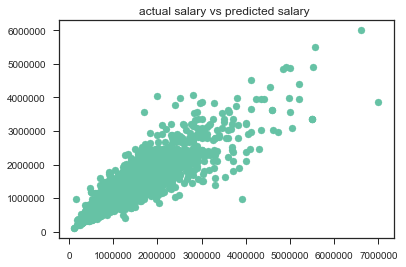

In [44]:
plt.scatter(np.exp(y_test), y_pred_rid)
plt.title('actual salary vs predicted salary ')

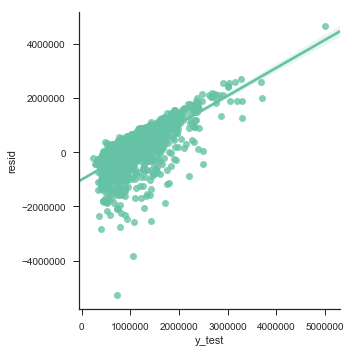

In [45]:
sns.lmplot(x='y_test', y='resid', data= X_test_original)

In [103]:
##
df1 = house_clean0.drop(['Month', 'Year', 'Propertycount', 'Distance', 'Price'],1)



df1 = get_groups_stats(df1, 'Regionname', stats='mean')
df1 = get_groups_stats(df1, 'Suburb', stats='mean')
df1 = get_groups_stats(df1, 'Type', stats='mean')
df1 = get_groups_stats(df1, 'SellerG', stats='mean')
df1 = get_groups_stats(df1, ['Type', 'Rooms1'], stats='mean')
df1 = get_groups_stats(df1, ['SellerG', 'Suburb'], stats='mean')
df1 = get_groups_stats(df1, ['SellerG', 'Regionname'], stats='mean')
df1 = get_groups_stats(df1, ['Regionname', 'Type', 'Rooms1'], stats='mean')
df1 = get_groups_stats(df1, ['SellerG', 'Type', 'Rooms1'], stats='mean')
df1 = get_groups_stats(df1, ['Suburb', 'SellerG', 'Type', 'Rooms1'], stats='mean')



df1 = get_groups_stats(df1, ['Type', 'Rooms1'], stats='std')
df1 = get_groups_stats(df1, ['SellerG', 'Suburb'], stats='std')
df1 = get_groups_stats(df1, ['Regionname', 'Type', 'Rooms1'], stats='std')
df1 = get_groups_stats(df1, ['SellerG', 'Type', 'Rooms1'], stats='std')
df1 = get_groups_stats(df1, ['Suburb', 'SellerG', 'Type', 'Rooms1'], stats='std')


In [104]:
# reordering 'Price' to first column
col_order = df1.columns.tolist()

col_order.append(col_order.pop(col_order.index('price_log')))

df1 = df1[col_order]


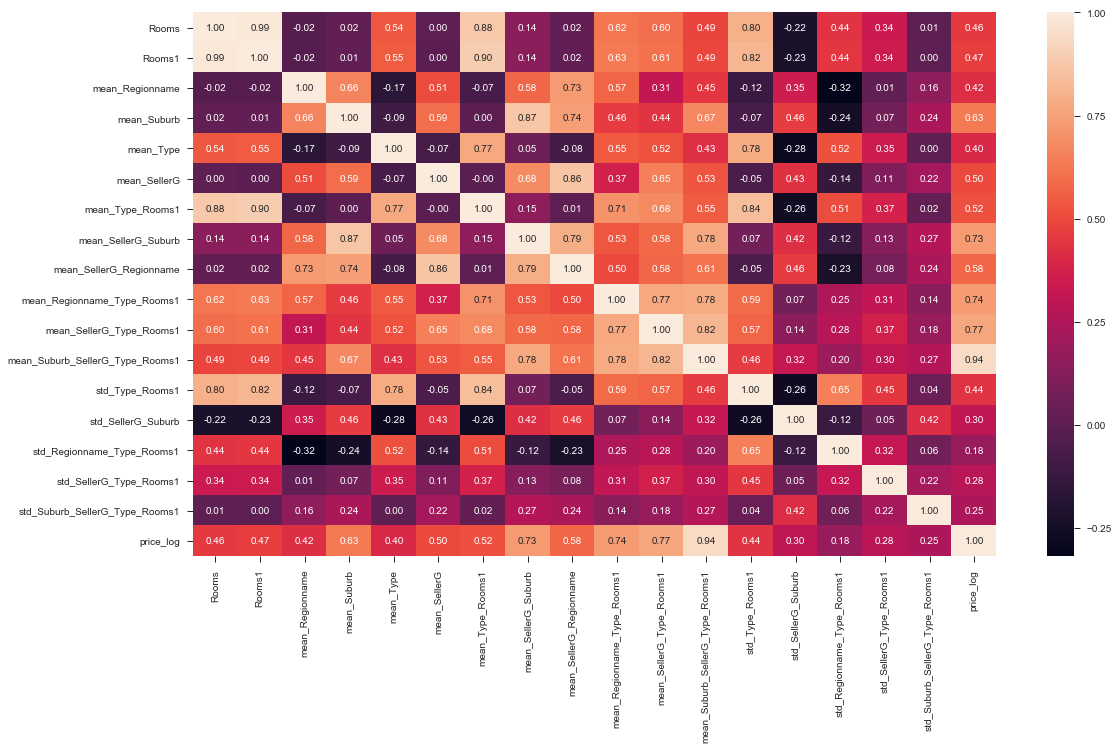

In [105]:
plt.figure(figsize=(18, 10))
sns.heatmap(df1.corr(), annot=True, fmt='.2f')
plt.show()

In [134]:
scaler1 = StandardScaler()


X1 = df1.drop(['Rooms', 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname', 'CouncilArea', 'price_log'],1)

# filling NaN from 'std_' features 
X1.fillna(0, inplace=True)


X1features = X1.columns

In [135]:
# X1 = scaler1.fit_transform(X1)
y1 = df1.price_log.copy()

X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size=0.2, random_state=42)

y1exp_test = np.exp(y1_test)

In [136]:
lr= LinearRegression()
lr.fit(X1_train, y1_train)
y1_pred_lr = np.exp(lr.predict(X1_test))
print ('R2 score on test:', lr.score(X1_test,y1_test))
print ('RMSE on test', np.sqrt(mean_squared_error(y1exp_test, y1_pred_lr)))
print ('MAE on test', mean_absolute_error(y1exp_test, y1_pred_lr)) 

R2 score on test: 0.8872113179270664
RMSE on test 239184.21856568268
MAE on test 127068.2516864067


In [137]:
alphaL = [10**i for i in range(3,-5,-1)]
alphas = [10**i for i in range(-4,4)]

In [138]:
lasso = LassoCV(random_state=42, alphas=alphaL)
lasso.fit(X1_train, y1_train)
y1_pred_las = np.exp(lasso.predict(X1_test))
print ('R2 score on test:', lasso.score(X1_test,y1_test))
print ('RMSE on test', np.sqrt(mean_squared_error(y1exp_test, y1_pred_las)))
print ('MAE on test', mean_absolute_error(y1exp_test, y1_pred_las)) 

R2 score on test: 0.8872842139341715
RMSE on test 239475.64665550465
MAE on test 127137.95624974559


In [139]:
ridge = RidgeCV(scoring='neg_mean_squared_error', alphas=alphas)
ridge.fit(X1_train,y1_train)
y1_pred_rid = np.exp(ridge.predict(X1_test))
print ('R2 score on test:', ridge.score(X1_test,y1_test))
print ('RMSE on test', np.sqrt(mean_squared_error(y1exp_test, y1_pred_rid)))
print ('MAE on test', mean_absolute_error(y1exp_test, y1_pred_rid)) 

R2 score on test: 0.8872169285241065
RMSE on test 239184.09708820496
MAE on test 127053.20870648246


In [140]:
# import os

# mingw_path = 'C:\Program Files\mingw-w64\x86_64-8.1.0-posix-seh-rt_v6-rev0\mingw64\bin'

# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from xgboost import XGBRegressor

In [141]:
xgb= XGBRegressor()
xgb.fit(X1_train, y1_train)
y1_pred_xgb = np.exp(xgb.predict(X1_test))
print  ('score on test:',  xgb.score(X1_test,y1_test))
print ('RMSE on test', np.sqrt(mean_squared_error(y1exp_test, y1_pred_xgb)))
print ('MAE on test', mean_absolute_error(y1exp_test, y1_pred_xgb) )

score on test: 0.8802207759932089
RMSE on test 258134.1036032018
MAE on test 131389.29144986346


In [142]:
X1_test_original= pd.DataFrame(scaler1.inverse_transform(X1_test))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
X1_test_original['y1_pred_rid'] = y1_pred_rid
X1_test_original['y1_test'] = np.exp(y1_test)
X1_test_original['resid'] = X1_test_original.y1_test - X1_test_original.y1_pred_rid

Text(0.5,1,'actual salary vs predicted salary ')

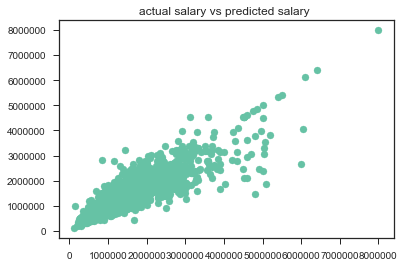

In [77]:
plt.scatter(np.exp(y1_test), y1_pred_rid)
plt.title('actual salary vs predicted salary ')

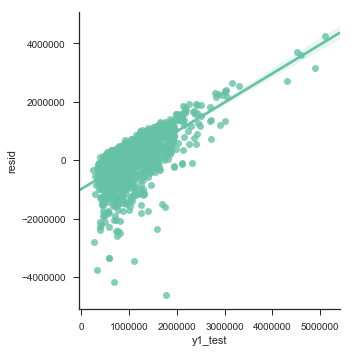

In [80]:
sns.lmplot(x='y1_test', y='resid', data= X1_test_original)

In [61]:
stop

NameError: name 'stop' is not defined

### There are several 'Address' with multiple entries (sold multiple times) - doesn't amount to much
#### Some cases of "VB" (vendor bid)  in 'Method' are exact duplicates except for 'Date'
- other cases, there are at least other changes (i.e., change in 'Suburb' or 'CouncilArea')

In [ ]:
multiple = house_clean0.groupby('Address').count().sort_values('Suburb', ascending=False)

In [ ]:
mult_list = multiple[multiple.Suburb > 1].index.tolist()

In [ ]:
mult_df = house_clean0[house_clean0.Address.apply(lambda x: x in mult_list)]

In [ ]:
mult_df.sort_values(by=['Address', 'Date']).head(10)

In [ ]:
mult_col = mult_df.columns.drop('Date')


mult_df1 = mult_df.drop_duplicates(subset=mult_col)
mult_df1.sort_values(by=['Address', 'Date']).head(10)

In [ ]:
dist_sub = house_clean0.groupby(['Distance', 'Suburb'])['Price'].mean().sort_values()

In [ ]:
g = sns.barplot(dist_sub.index, dist_sub.values)
g.axes.get_xaxis().set_visible(False)

In [ ]:
dist_counc = house_clean0.groupby(['Distance', 'CouncilArea'])['Price'].mean().sort_values()

In [ ]:
g = sns.barplot(dist_counc.index, dist_counc.values)
g.axes.get_xaxis().set_visible(False)

In [ ]:
dist_reg = house_clean0.groupby(['Distance', 'Regionname'])['Price'].mean().sort_values()

In [ ]:
g = sns.barplot(dist_reg.index, dist_reg.values)
g.axes.get_xaxis().set_visible(False)

In [ ]:
sns.regplot(house_clean0.Distance, house_clean0.Price)

In [ ]:

# df = get_groups_stats(df, 'Method', stats='mean')

# df = get_groups_stats(df, 'CouncilArea', stats='count')
# df = get_groups_stats(df, 'Regionname', stats='count')
# df = get_groups_stats(df, 'Suburb', stats='count')

# df = get_groups_stats(df, 'CouncilArea', stats='median')
# df = get_groups_stats(df, 'Regionname', stats='median')
# df = get_groups_stats(df, 'Suburb', stats='median')

# df = get_groups_stats(df, 'Type', stats='mean')
# df = get_groups_stats(df, 'Method', stats='mean')

# df = get_groups_stats(df, ['Suburb', 'Method'], stats='mean')
# df = get_groups_stats(df, ['Regionname', 'Method'], stats='mean')

# df = get_groups_stats(df, ['Suburb', 'Type', 'Method'], stats='mean')
# df = get_groups_stats(df, ['Regionname', 'Type', 'Method'], stats='mean')

# df = get_groups_stats(df, ['SellerG', 'Suburb', 'Type'], stats='mean')

# df = get_groups_stats(df, ['Type', 'Distance'], stats='mean')
# df = get_groups_stats(df, ['Distance', 'Rooms'], stats='mean') # too correlated with 'Suburb'
# df = get_groups_stats(df, ['Distance', 'Type', 'Rooms'], stats='mean')

# df = get_groups_stats(df, ['Type', 'Propertycount'], stats='mean') # 'Propertycount' correlated to 'Suburb'
# df = get_groups_stats(df, ['Propertycount', 'Rooms'], stats='mean') 
# df = get_groups_stats(df, ['Propertycount', 'Type', 'Rooms'], stats='mean')

# mapped_dist not better than 'Distance'
# df['Rooms1'] = df['Rooms'].apply(lambda x: 9 if x>8 else x)

- use Lasso, not LassoCV
    - lassocv overfits if checking feature coef_?
- threshold for skew and kurt?
- shuffling necessary? 
